# Perform a dictionary learning (and atom extraction) from the MNIST dataset
 * Dictionary learning finds atoms to form a sparse representation of input data
 * Complex input can be seen as a sparse combination of primitive components.
 * MNIST digits can be seen as a sparse combination of all possible ink strokes.

### Import libraries

In [1]:
import skimage
import matplotlib.pyplot as plt

### Load, Explore and Pre-process Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

## Explore Data

In [3]:
digits.data.shape

(1797, 64)

This process can be very long on low-end machines. In such a case,
limit the number of samples to 20 or 30.

In [4]:
NUM_IMAGES = 48

In [5]:
sample = digits.data[:NUM_IMAGES, :]

In [6]:
sample.shape

(48, 64)

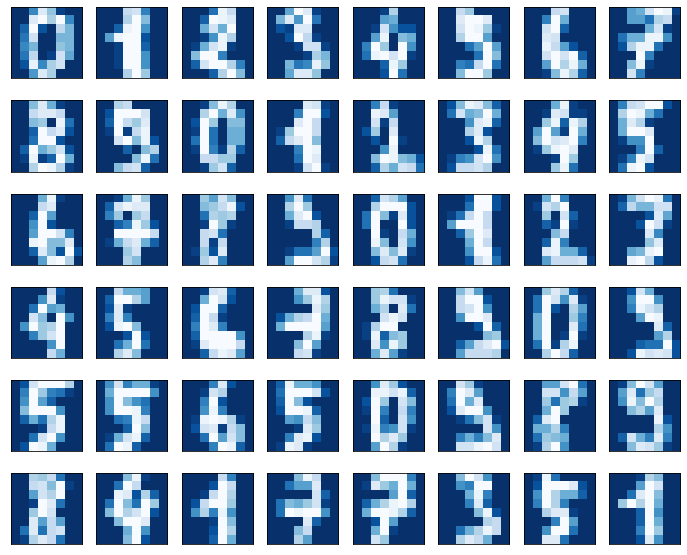

In [7]:
fig = plt.figure(figsize = (12, 10))  

for i in range(NUM_IMAGES):
    
    ax = fig.add_subplot(6, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(sample[i].reshape(8, 8), cmap = 'Blues_r',interpolation = 'nearest')

## DictionaryLearning
* Finds a dictionary (a set of atoms) that can best be used to represent data using a sparse code.
* n_components : number of dictionary elements to extract
* fit_algorithm : lars uses the least angle regression method to solve the lasso problem 
* transform_algorithm : Algorithm used to transform the data lars: uses the least angle regression method 
* lasso_lars: uses Lars to compute the Lasso solution

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html

In [8]:
from sklearn.decomposition import DictionaryLearning

dict_learn = DictionaryLearning(n_components = 36, fit_algorithm = 'lars', 
                                transform_algorithm = 'lasso_lars')

## fit_transform
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [9]:
X_dict = dict_learn.fit_transform(sample)

In [10]:
X_dict.shape

(48, 36)

In [11]:
resized = skimage.transform.resize(X_dict[0].reshape(6, 6), (8, 8))

In [12]:
resized

array([[ 1.00350150e-02,  5.01750749e-02,  9.25356428e-01,
        -2.96987802e-01, -1.60818163e+01, -7.01723288e+00,
        -9.23335559e-02, -2.15444964e-01],
       [ 5.01750749e-02,  2.50875375e-01,  6.25953097e-01,
        -1.27280486e-01, -6.89220697e+00, -3.00738552e+00,
        -3.95715239e-02, -9.23335559e-02],
       [ 5.01750749e-02,  2.50875375e-01,  2.50875375e-01,
         0.00000000e+00,  0.00000000e+00, -5.03859593e-01,
        -3.49398853e-01,  2.59636475e-01],
       [-2.71149621e+00, -1.38453897e+00, -2.43325648e-01,
         0.00000000e+00,  0.00000000e+00, -1.17567238e+00,
        -8.15263990e-01,  6.05818442e-01],
       [-1.89804735e+01, -9.69177279e+00, -1.70327954e+00,
         0.00000000e+00,  0.00000000e+00, -1.67953198e-01,
        -1.16466284e-01,  8.65454918e-02],
       [-8.13448864e+00, -4.15361691e+00, -7.29976944e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.000000

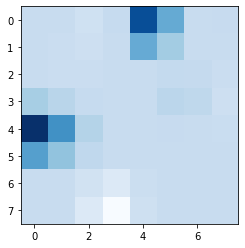

In [13]:
plt.imshow(resized, cmap = 'Blues_r')

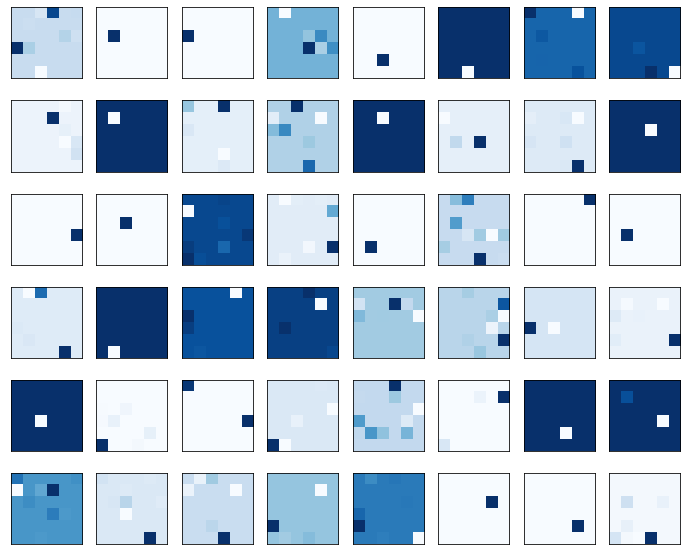

In [14]:
fig = plt.figure(figsize=(12, 10))  

for i in range(NUM_IMAGES):

    ax = fig.add_subplot(6, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_dict[i].reshape(6, 6), cmap = 'Blues_r',interpolation = 'nearest')

## Recreate features from atoms

components_ : array, [n_components, n_features] - dictionary atoms extracted from the data

In [15]:
dict_learn.components_.shape

(36, 64)

In [16]:
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

In [17]:
original.shape

(48, 64)

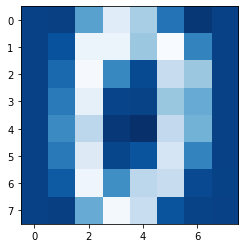

In [18]:
plt.imshow(original[0].reshape(8, 8), cmap = 'Blues_r')

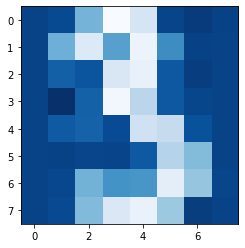

In [19]:
plt.imshow(original[3].reshape(8, 8), cmap = 'Blues_r')